In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from scipy import stats
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.metrics import precision_score, recall_score, f1_score


In [2]:
data = pd.read_csv('StudentsPerformance.csv')
print(data.shape)
data.head()

(1000, 8)


,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [3]:
#Summary statistics

print("Summary Statistics:")
print(data.describe())


print(f"Missing Values:\n", data.isnull().sum())
print(f"Categorical Variables Distribution:")
for col in ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']:
    print(f"{col}:\n{data[col].value_counts()}\n")

Summary Statistics:
       math score  reading score  writing score
count  1000.00000    1000.000000    1000.000000
mean     66.08900      69.169000      68.054000
std      15.16308      14.600192      15.195657
min       0.00000      17.000000      10.000000
25%      57.00000      59.000000      57.750000
50%      66.00000      70.000000      69.000000
75%      77.00000      79.000000      79.000000
max     100.00000     100.000000     100.000000
Missing Values:
 gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64
Categorical Variables Distribution:
gender:
gender
female    518
male      482
Name: count, dtype: int64

race/ethnicity:
race/ethnicity
group C    319
group D    262
group B    190
group E    140
group A     89
Name: count, dtype: int64

parental level 

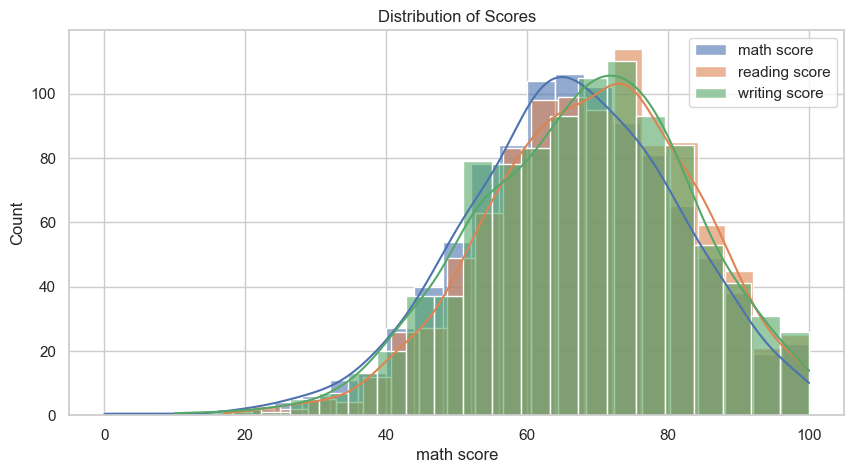

In [4]:
sns.set(style='whitegrid')
plt.figure(figsize=(10, 5))
plt.title("Distribution of Scores")
for col in ['math score', 'reading score', 'writing score']:
    sns.histplot(data[col], kde=True, label=col, alpha=0.6)
plt.legend()
plt.show()

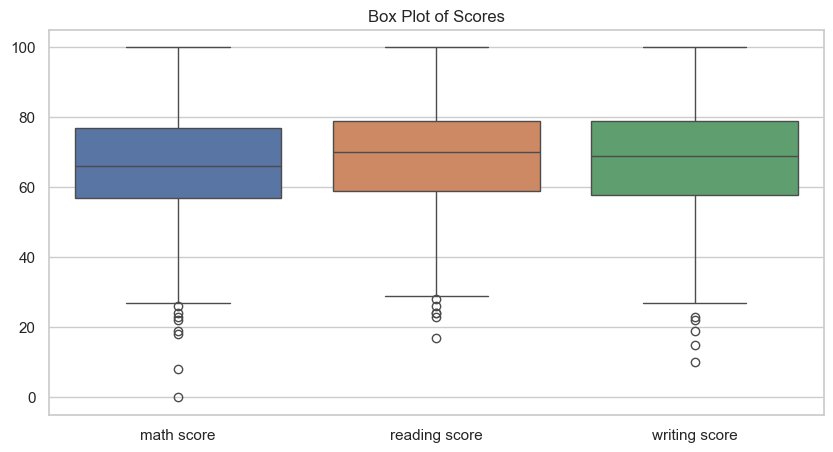

In [5]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=data[['math score', 'reading score', 'writing score']])
plt.title("Box Plot of Scores")
plt.show()

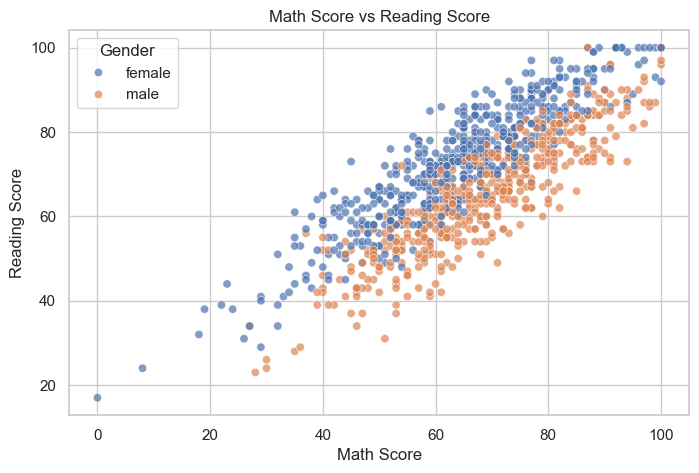

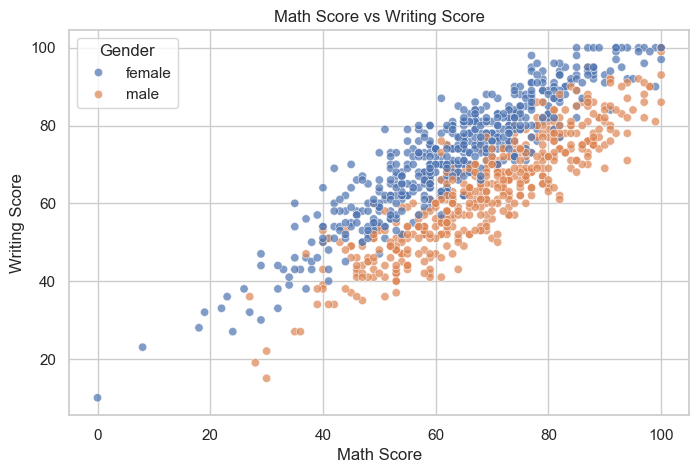

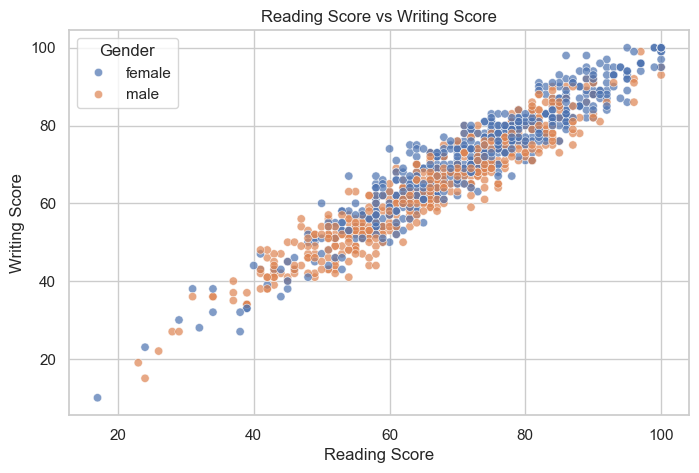

In [6]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='math score', y='reading score', data=data, hue='gender', alpha=0.7)
plt.title("Math Score vs Reading Score")
plt.xlabel("Math Score")
plt.ylabel("Reading Score")
plt.legend(title='Gender')
plt.show()


plt.figure(figsize=(8, 5))
sns.scatterplot(x='math score', y='writing score', data=data, hue='gender', alpha=0.7)
plt.title("Math Score vs Writing Score")
plt.xlabel("Math Score")
plt.ylabel("Writing Score")
plt.legend(title='Gender')
plt.show()

plt.figure(figsize=(8, 5))
sns.scatterplot(x='reading score', y='writing score', data=data, hue='gender', alpha=0.7)
plt.title("Reading Score vs Writing Score")
plt.xlabel("Reading Score")
plt.ylabel("Writing Score")
plt.legend(title='Gender')
plt.show()


In [7]:
X = data.drop(columns=['math score'])  
y = data['math score']
categorical_features = ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']
X_encoded = pd.get_dummies(X, columns=categorical_features, drop_first=True)

Model Evaluation Results:
                        MAE        MSE  R² Score
Linear Regression  4.494468  30.708152  0.871292
Decision Tree      6.533333  70.126667  0.706077
Random Forest      5.162467  38.778688  0.837466
Gradient Boosting  4.734199  33.988120  0.857545


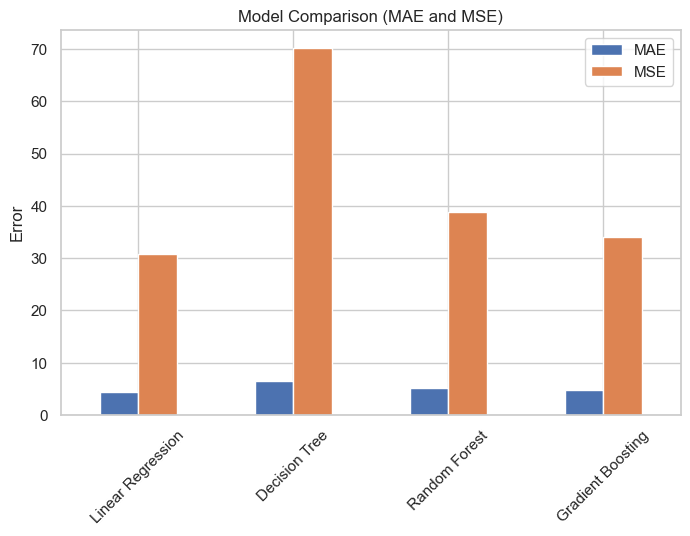

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.3, random_state=40)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(n_estimators=100, random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, random_state=42)
}

def train_and_evaluate(models, X_train, X_test, y_train, y_test):
    results = {}
    for name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        mae = mean_absolute_error(y_test, y_pred)
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)
        results[name] = {
            "MAE": mae,
            "MSE": mse,
            "R² Score": r2
        }
    
    return results

results = train_and_evaluate(models, X_train_scaled, X_test_scaled, y_train, y_test)

results_df = pd.DataFrame(results).T

print("Model Evaluation Results:")
print(results_df)

import matplotlib.pyplot as plt

results_df[['MAE', 'MSE']].plot(kind='bar', figsize=(8, 5))
plt.title('Model Comparison (MAE and MSE)')
plt.ylabel('Error')
plt.xticks(rotation=45)
plt.show() 



Model Accuracy: 0.06

Classification Report:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.25      0.50      0.33         2
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         4
          43       0.00      0.00      0.00         2
          44       0.00      0.00  

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

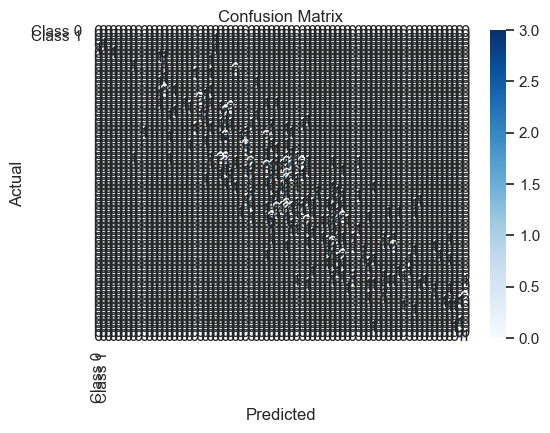

Model Performance Summary:


NameError: name 'model_performance' is not defined

In [9]:
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("\nModel Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()
print(f"Model Performance Summary:")
for name, accuracy in model_performance.items():
    print(f"{name}: {accuracy:.4f}")
    

In [50]:
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
rf = RandomForestClassifier()
grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)
print("Best parameters found: ", grid_search.best_params_)

best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("\nBest model accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Fitting 5 folds for each of 108 candidates, totalling 540 fits


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\model_selection\_split.py:776: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


Best parameters found:  {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 300}

Best model accuracy: 0.02666666666666667

Classification Report:
               precision    recall  f1-score   support

          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          30       0.00      0.00      0.00         0
          32       0.00      0.00      0.00         1
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         4
          4

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{


Model Accuracy: 0.06

Classification Report:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         0
          19       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.25      0.50      0.33         2
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         4
          43       0.00      0.00  

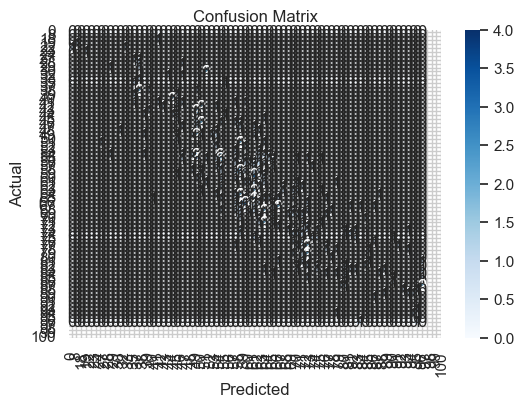


Model Performance Summary:
Accuracy: 0.0600


In [12]:
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the GradientBoostingClassifier
model = GradientBoostingClassifier()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Accuracy
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))

# Dynamically set class labels
class_labels = model.classes_ if hasattr(model, "classes_") else [0, 1]

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Performance Summary (if `model_performance` is defined)
model_performance = {
    "Accuracy": accuracy_score(y_test, y_pred),
    # You can add other metrics if needed
}
print(f"\nModel Performance Summary:")
for name, accuracy in model_performance.items():
    print(f"{name}: {accuracy:.4f}")



Model Accuracy: 0.04666666666666667

Classification Report:
              precision    recall  f1-score   support

          18       0.00      0.00      0.00         0
          26       0.00      0.00      0.00         1
          27       0.00      0.00      0.00         1
          29       0.00      0.00      0.00         2
          32       0.00      0.00      0.00         1
          33       0.00      0.00      0.00         0
          34       0.00      0.00      0.00         2
          35       0.00      0.00      0.00         2
          36       0.00      0.00      0.00         2
          37       0.00      0.00      0.00         2
          38       0.00      0.00      0.00         2
          39       0.00      0.00      0.00         1
          40       0.00      0.00      0.00         2
          41       0.00      0.00      0.00         0
          42       0.00      0.00      0.00         4
          43       0.00      0.00      0.00         2
          44       0

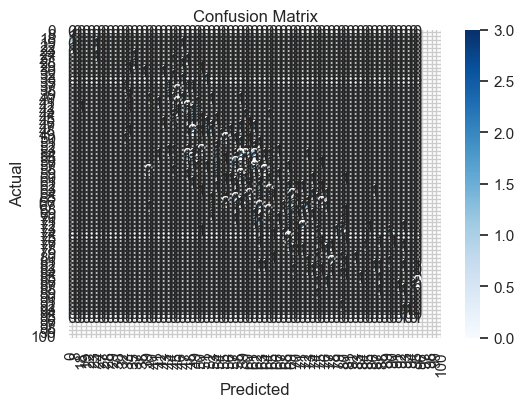


Model Performance Summary:
Accuracy: 0.0467


TypeError: can only concatenate str (not "numpy.int64") to str

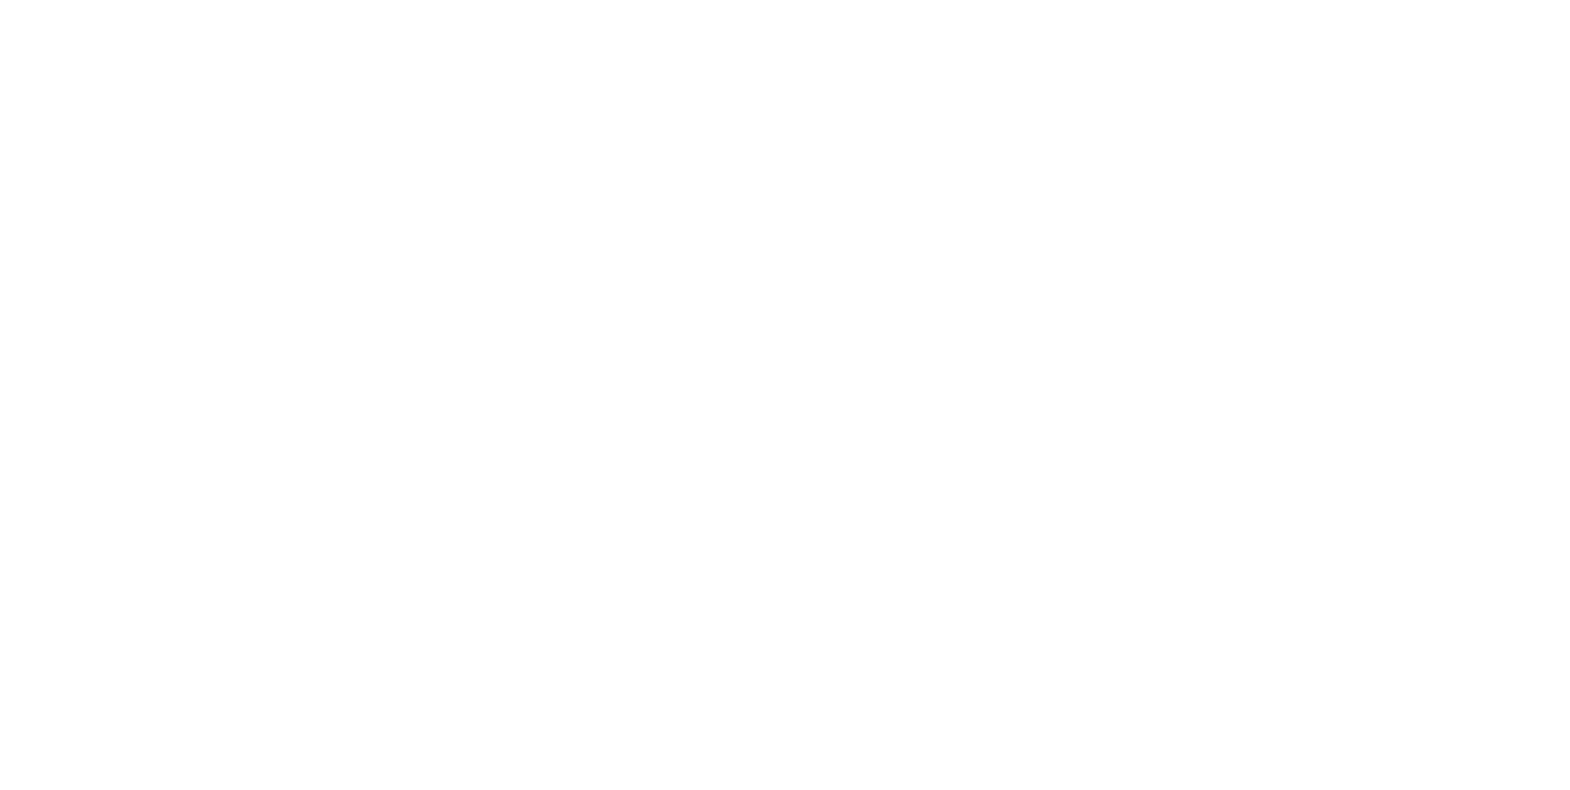

In [13]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix
)
import matplotlib.pyplot as plt
import seaborn as sns

# Fit the DecisionTreeClassifier
model = DecisionTreeClassifier(random_state=42)  # You can set max_depth or other hyperparameters as needed
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Model Accuracy
print("\nModel Accuracy:", accuracy_score(y_test, y_pred))

# Classification Report
print("\nClassification Report:")
print(classification_report(y_test, y_pred, zero_division=0))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))

# Dynamically set class labels
class_labels = model.classes_ if hasattr(model, "classes_") else sorted(set(y_test))

sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

# Model Performance Summary
model_performance = {
    "Accuracy": accuracy_score(y_test, y_pred),
    # You can add other metrics if needed
}
print(f"\nModel Performance Summary:")
for name, value in model_performance.items():
    print(f"{name}: {value:.4f}")

from sklearn.tree import plot_tree

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=X_train.columns, class_names=class_labels, filled=True)
plt.show()
